# Multi-class Classification Model
* More than 3 classes

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
import pandas as pd
import itertools
from sklearn.datasets import *
from sklearn.metrics import confusion_matrix
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist
print(tf.config.list_physical_devices('GPU'))
import random



[]


In [2]:
(train_data, train_labels),(test_data, test_lables) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
classes = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankel boot"]

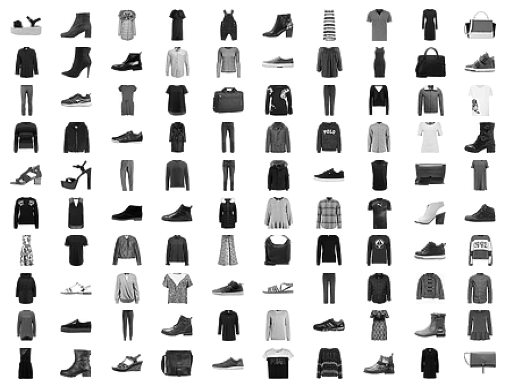

In [4]:
for i in range(100):
    ax = plt.subplot(10, 10, i+1)
    index = random.choice(range(len(train_data)))
    plt.imshow(train_data[index],cmap=plt.cm.binary)
    # plt.title(classes[train_labels[index]])
    plt.axis(False)

* Input shape = 28 x 28
* Output shape = 10
* Loss function = Categorical Cross Entropy
* Activation = Softmax

In [5]:
tf.random.set_seed(42)

In [6]:
def plot(model, X: np.ndarray, y: np.ndarray):
    x_max, x_min = X[:, 0].max() + 0.1, X[:, 0].min() - 0.1
    y_max, y_min = X[:, 1].max() + 0.1, X[:, 1].min() - 0.1
    print("X max and min: ", x_max, x_min)
    print("Y max and min: ", y_max, y_min)
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )
    print("Dimension meshgrid: ", xx.shape, yy.shape)
    x_in = np.c_[xx.ravel(), yy.ravel()]
    print("Dimension ravel: ", x_in.shape)
    pred = model.predict(x_in)
    loss, accuracy = model.evaluate(x_test, y_test)
    print(f"Loss: {loss}\nAccuracy: {accuracy*100:2f}")

    if len(pred[0]) > 1:
        print("Multiclass")
        pred = np.argmax(pred, axis=1).reshape(xx.shape)
    else:
        print("Binary")
        pred = np.round(pred).reshape(xx.shape)

    plt.contourf(xx, yy, pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [7]:
test_lables.shape,test_data.shape

((10000,), (10000, 28, 28))

In [8]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
#CategoricalCrossentropy() for one-hot labels only
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
              optimizer=keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])


history = model.fit(
    train_data,
    train_labels,
    epochs=100,
    verbose=0,
    validation_data=(test_data, test_lables)
)

In [9]:
train_data.min(), train_data.max()

(0, 255)

# Neural networks tend to perform better when data is normalized or scaled between 0 and 1

In [62]:
# Normalizing the data
train_data_n = train_data/255.0
test_data_n = test_data/255.0

In [63]:
# Normalized dataset
norm_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
#CategoricalCrossentropy() for one-hot labels only
norm_model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
              optimizer=keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])


norm_history = norm_model.fit(
    train_data_n,
    train_labels,
    epochs=100,
    validation_data=(test_data_n, test_lables)
)

Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5889 - accuracy: 0.7862 - val_loss: 0.4962 - val_accuracy: 0.8251
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4608 - accuracy: 0.8368 - val_loss: 0.5006 - val_accuracy: 0.8224
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4343 - accuracy: 0.8476 - val_loss: 0.4883 - val_accuracy: 0.8136
Epoch 4/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4176 - accuracy: 0.8517 - val_loss: 0.4721 - val_accuracy: 0.8369
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4077 - accuracy: 0.8556 - val_loss: 0.4545 - val_accuracy: 0.8390
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4075 - accuracy: 0.8597 - val_loss: 0.5028 - val_accuracy: 0.8340
Epoch 7/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3857 - accuracy: 0.8633 - val_loss: 0.5062 - val_ac

# Notes to self: Normalized data takes longer to train (100% increase in duration)

313/313 [==============================] - 1s 3ms/step - loss: 2.3031 - accuracy: 0.1000


([0.5002601146697998, 0.8579000234603882],
 [2.303095579147339, 0.10000000149011612])

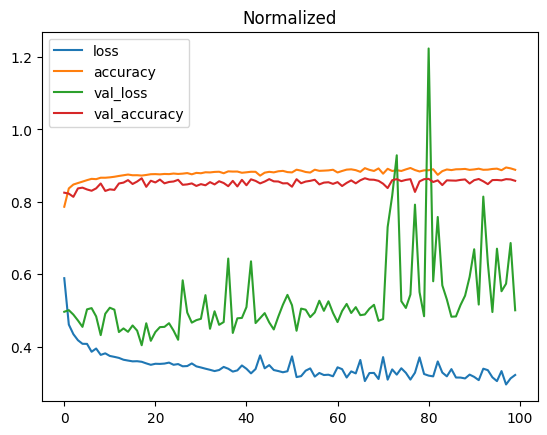

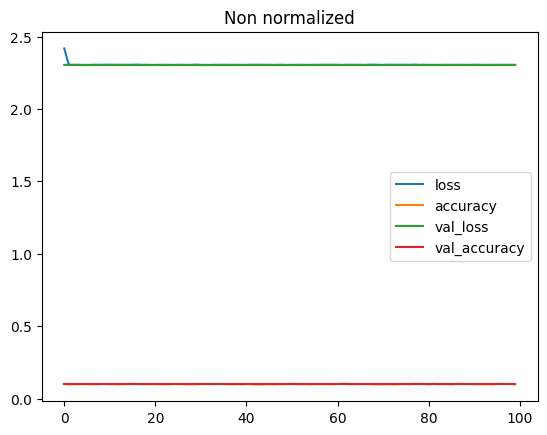

In [64]:
pd.DataFrame(norm_history.history).plot(title="Normalized")
pd.DataFrame(history.history).plot(title="Non normalized")
norm_model.evaluate(test_data_n,test_lables), model.evaluate(test_data,test_lables)


In [65]:
pred_norm = norm_model.predict(test_data_n)

313/313 [==============================] - 1s 2ms/step


In [66]:
pred_norm[:2], test_lables[:2]


(array([[6.3424679e-27, 0.0000000e+00, 1.6590597e-16, 0.0000000e+00,
         7.0820035e-15, 2.2182073e-06, 1.5601074e-15, 3.7482979e-03,
         8.5060759e-07, 9.9624866e-01],
        [1.1729370e-06, 8.4386725e-04, 9.4073391e-01, 6.3443567e-06,
         5.8389746e-02, 0.0000000e+00, 2.5010924e-05, 0.0000000e+00,
         1.6041748e-12, 0.0000000e+00]], dtype=float32),
 array([9, 2], dtype=uint8))

<Axes: >

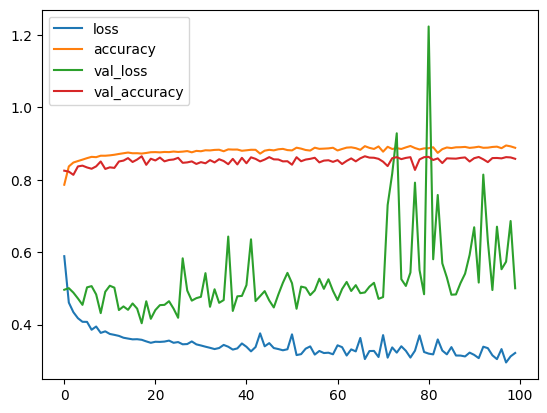

In [67]:
pd.DataFrame(norm_history.history).sort_values(by=["accuracy","loss"])
pd.DataFrame(norm_history.history).plot()

# Evaluation

In [84]:

def plot_conf_mat(cm: np.ndarray, classes=classes, figsize: tuple = (7, 7), cmap: plt.cm = plt.cm.Blues):
    cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]
    n_classes = cm.shape[0]

    fig, ax = plt.subplots(figsize=figsize)

    cax = ax.matshow(cm, cmap=cmap)
    fig.colorbar(cax)

    if classes is not None:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    ax.set(title="Confusion Matrix",
           xlabel="Predicted",
           ylabel="Expected",
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels)
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    ax.yaxis.label.set_size(10)
    ax.xaxis.label.set_size(10)
    thresh = (cm.max()+cm.min())/2

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i,j]} ({round(cm_norm[i,j]*100,2)}%)", horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",)

In [69]:
pred_norm = norm_model.predict(test_data_n)



313/313 [==============================] - 1s 2ms/step


(array([9.8609537e-01, 2.4526935e-06, 8.9131017e-06, 4.9933500e-04,
        7.5799406e-10, 9.5221926e-31, 1.3389131e-02, 6.0776861e-23,
        4.6562054e-06, 7.4793124e-36], dtype=float32),
 'T-shirt/top')

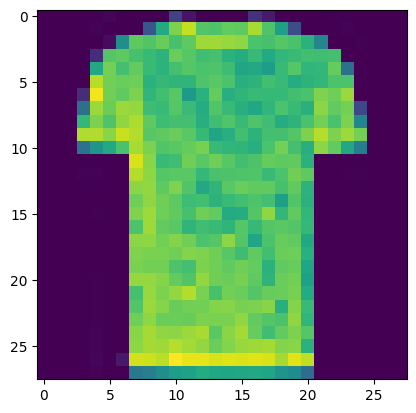

In [98]:
nn = 125
plt.imshow(test_data[nn])
pred_norm[nn],classes[tf.argmax(pred_norm[nn])]

In [79]:
# convrting preds to appropirate format and shape for conf mat
preds_conv = pred_norm.argmax(axis=1)
preds_conv, test_lables

(array([9, 2, 1, ..., 8, 1, 5], dtype=int64),
 array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

In [80]:
cm = confusion_matrix(test_lables,preds_conv)
cm

array([[671,   1,  10,  45,   6,   4, 257,   0,   5,   1],
       [  2, 961,   1,  25,   3,   1,   7,   0,   0,   0],
       [  6,   0, 709,  14, 175,   0,  94,   0,   2,   0],
       [ 16,   8,   4, 890,  41,   2,  35,   0,   4,   0],
       [  1,   0,  63,  35, 852,   2,  46,   0,   1,   0],
       [  0,   0,   0,   3,   0, 941,   2,  30,   3,  21],
       [ 74,   1,  71,  37, 122,   1, 688,   0,   6,   0],
       [  0,   0,   0,   0,   0,  15,   0, 959,   0,  26],
       [  1,   0,   2,   5,   4,   4,  23,   5, 956,   0],
       [  0,   0,   0,   0,   0,   8,   1,  39,   0, 952]], dtype=int64)

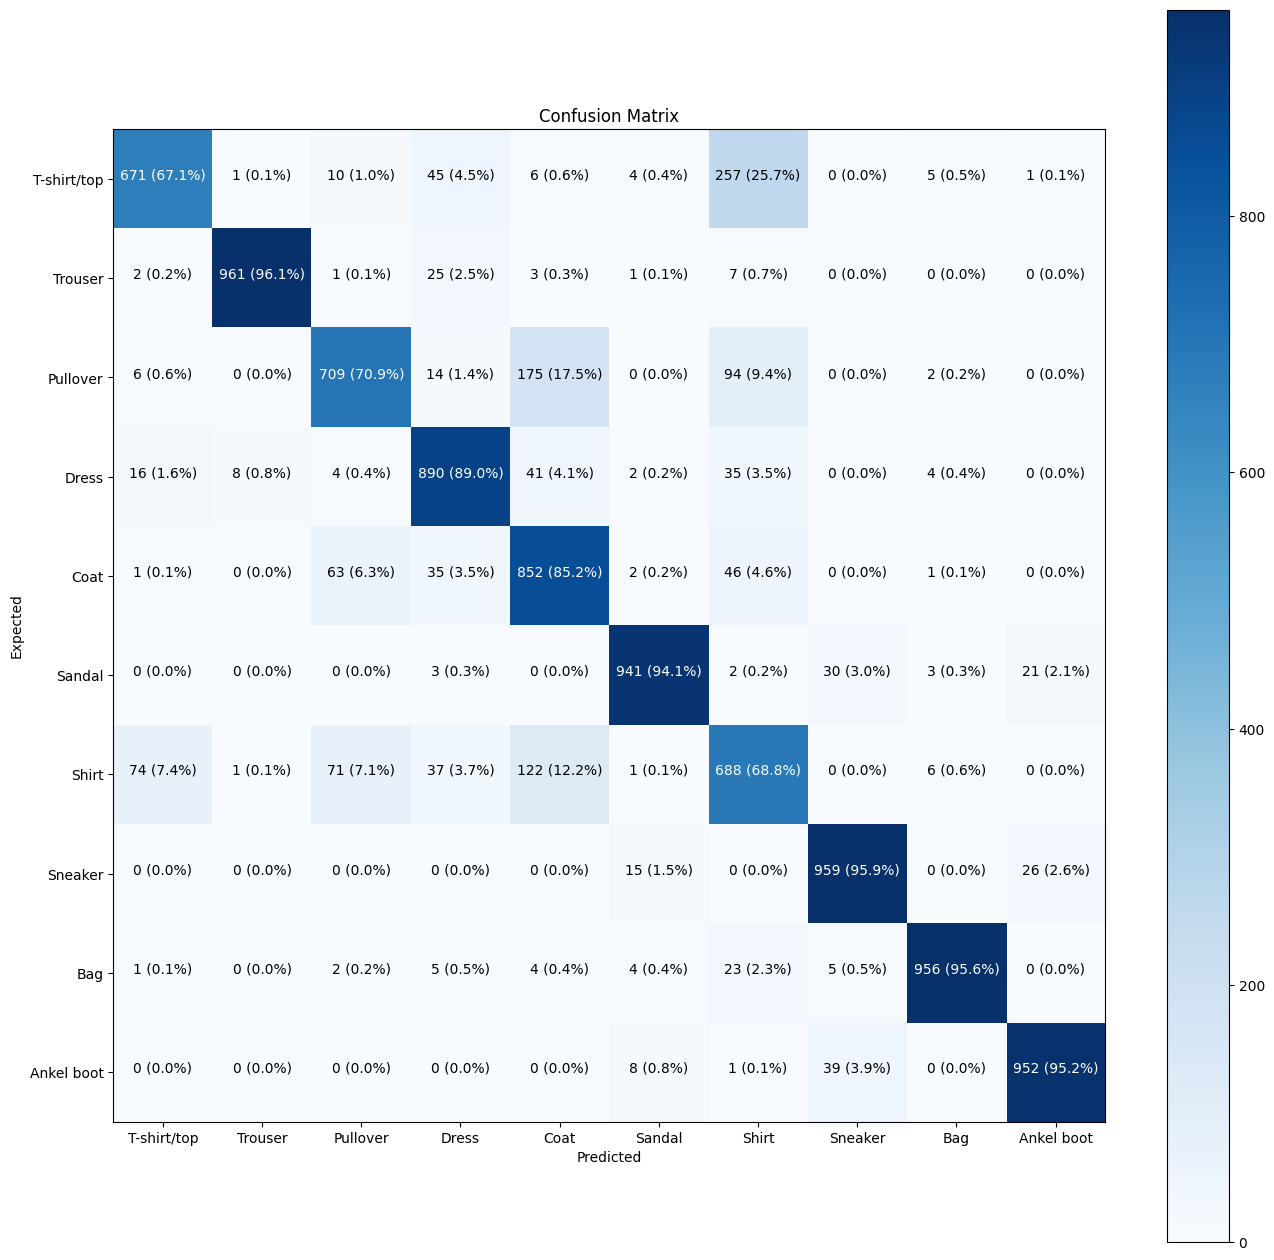

In [92]:
plot_conf_mat(cm,figsize=(16,16))

In [99]:
tf.saved_model.save(norm_model,"./saved_models/MultiClass")

INFO:tensorflow:Assets written to: ./saved_models/MultiClass\assets


INFO:tensorflow:Assets written to: ./saved_models/MultiClass\assets
